In [24]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

data = pd.read_csv('data.txt', delim_whitespace=True)
data.head()

/tmp/ipykernel_655677/4160744792.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('data.txt', delim_whitespace=True)


,Timestamp,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
0,2025-03-13:00:00:00,0,7.21,7.03,7.26,2.60,1.66,3.09,-0.74,-2.51,...,-56.57,0.18,0.11,0.26,555.24,547.02,561.65,136135,121117,153154
1,2025-03-13:00:05:00,0,6.98,6.95,7.03,2.03,0.53,2.41,-0.43,-0.83,...,-69.39,0.16,0.10,0.39,558.27,551.99,567.91,127127,92475,195859
2,2025-03-13:00:10:00,0,6.64,6.26,6.82,3.81,2.98,4.89,-0.55,-1.09,...,-42.48,0.11,0.10,0.19,536.44,520.12,553.48,118924,85942,154367
3,2025-03-13:00:15:00,0,6.27,5.25,6.51,3.85,2.89,4.99,-3.39,-3.59,...,-16.41,0.10,0.10,0.23,548.70,533.30,553.31,176311,92195,243251
4,2025-03-13:00:20:00,0,6.55,6.50,6.73,5.86,5.55,6.63,-2.40,-3.07,...,23.18,0.10,0.10,0.10,534.14,499.73,539.49,246684,60255,269295


In [3]:
data.describe()

,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,By-max,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,...,1941.000000,1941.00000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1.941000e+03
mean,0.368367,-3084.909928,-3085.170077,-3084.760392,-3088.221710,-3088.927357,-3087.608217,-3093.686043,-3094.502813,-3092.778903,...,-3096.951917,-666.69425,-666.949681,-666.338336,-194.422287,-202.245234,-185.662324,1.379031e+05,1.123315e+05,1.734808e+05
std,0.500318,17313.307998,17313.261529,17313.334710,17312.716443,17312.590410,17312.826021,17311.740287,17311.594343,17311.902375,...,17311.191763,8158.69398,8158.672897,8158.723370,8197.698674,8197.045875,8198.442169,1.148524e+05,1.064906e+05,1.255326e+05
min,-1.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,-99999.000000,-99999.00000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-9.999900e+04,-9.999900e+04,-9.999900e+04
25%,0.000000,4.920000,4.730000,5.050000,1.100000,0.210000,2.010000,-4.700000,-5.320000,-3.860000,...,-37.360000,0.10000,0.100000,0.140000,412.900000,408.500000,420.200000,6.697600e+04,5.223600e+04,9.089400e+04
50%,0.000000,6.170000,5.740000,6.390000,3.100000,2.290000,3.710000,-3.010000,-3.800000,-2.080000,...,-7.810000,0.40000,0.220000,0.730000,484.200000,476.900000,489.960000,1.181170e+05,9.102500e+04,1.557020e+05
75%,1.000000,7.240000,7.020000,7.400000,4.570000,4.060000,5.000000,-0.850000,-2.000000,0.250000,...,18.790000,5.80000,5.250000,6.310000,530.520000,519.040000,542.000000,1.764220e+05,1.389190e+05,2.213190e+05
max,2.000000,12.840000,12.820000,12.930000,9.950000,9.700000,10.610000,6.170000,5.540000,7.300000,...,88.130000,21.47000,21.390000,42.840000,620.600000,617.900000,802.050000,1.030086e+06,1.024103e+06,1.038440e+06


Just remove all entries with wonky entries (-99999.00000)

In [4]:
data = data[data['Bt-med'] > -99998.0]
data.describe()

,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,By-max,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
count,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,...,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1.881000e+03,1.881000e+03,1.881000e+03
mean,0.357788,6.448607,6.180159,6.602913,3.031186,2.303030,3.664248,-2.607448,-3.450271,-1.671372,...,-5.977496,-156.338309,-156.600691,-155.973865,319.711361,311.868921,328.513456,1.411455e+05,1.153410e+05,1.771783e+05
std,0.487181,1.840343,1.897259,1.825082,2.511887,2.700764,2.367306,2.684215,2.464531,2.882516,...,35.418550,3991.578963,3991.568261,3991.593860,4011.048076,4010.712515,4011.450760,1.145564e+05,1.063461e+05,1.249618e+05
min,0.000000,2.940000,1.650000,3.630000,-4.270000,-8.510000,-3.500000,-9.530000,-9.740000,-8.670000,...,-81.440000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-9.999900e+04,-9.999900e+04,-9.999900e+04
25%,0.000000,4.980000,4.800000,5.130000,1.320000,0.410000,2.250000,-4.540000,-5.150000,-3.680000,...,-34.680000,0.100000,0.100000,0.150000,414.600000,409.100000,421.440000,7.181700e+04,5.466300e+04,9.764100e+04
50%,0.000000,6.290000,5.860000,6.510000,3.210000,2.430000,3.790000,-2.860000,-3.710000,-1.950000,...,-6.590000,0.450000,0.250000,0.790000,487.100000,480.600000,494.000000,1.205710e+05,9.310300e+04,1.584310e+05
75%,1.000000,7.280000,7.050000,7.430000,4.600000,4.110000,5.090000,-0.720000,-1.910000,0.340000,...,19.700000,5.940000,5.400000,6.420000,531.740000,521.000000,542.900000,1.784770e+05,1.412930e+05,2.229290e+05
max,2.000000,12.840000,12.820000,12.930000,9.950000,9.700000,10.610000,6.170000,5.540000,7.300000,...,88.130000,21.470000,21.390000,42.840000,620.600000,617.900000,802.050000,1.030086e+06,1.024103e+06,1.038440e+06


In [5]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d:%H:%M:%S')

In [6]:
data['Timestamp']

0      2025-03-13 00:00:00
1      2025-03-13 00:05:00
2      2025-03-13 00:10:00
3      2025-03-13 00:15:00
4      2025-03-13 00:20:00
               ...        
1936   2025-03-19 18:10:00
1937   2025-03-19 18:15:00
1938   2025-03-19 18:20:00
1939   2025-03-19 18:25:00
1940   2025-03-19 18:30:00
Name: Timestamp, Length: 1881, dtype: datetime64[ns]

In [ ]:
window_size = 6
#moving_avg = pd.rolling_mean()

timeSeries = data.loc[:, ["Timestamp", "Temp-med"]]
timeSeries.index = timeSeries.Timestamp

ts = timeSeries.drop("Temp-med", axis=1)

plt.figure(figsize=(22, 10))
plt.plot(data['Timestamp'], data['Bt-med'])


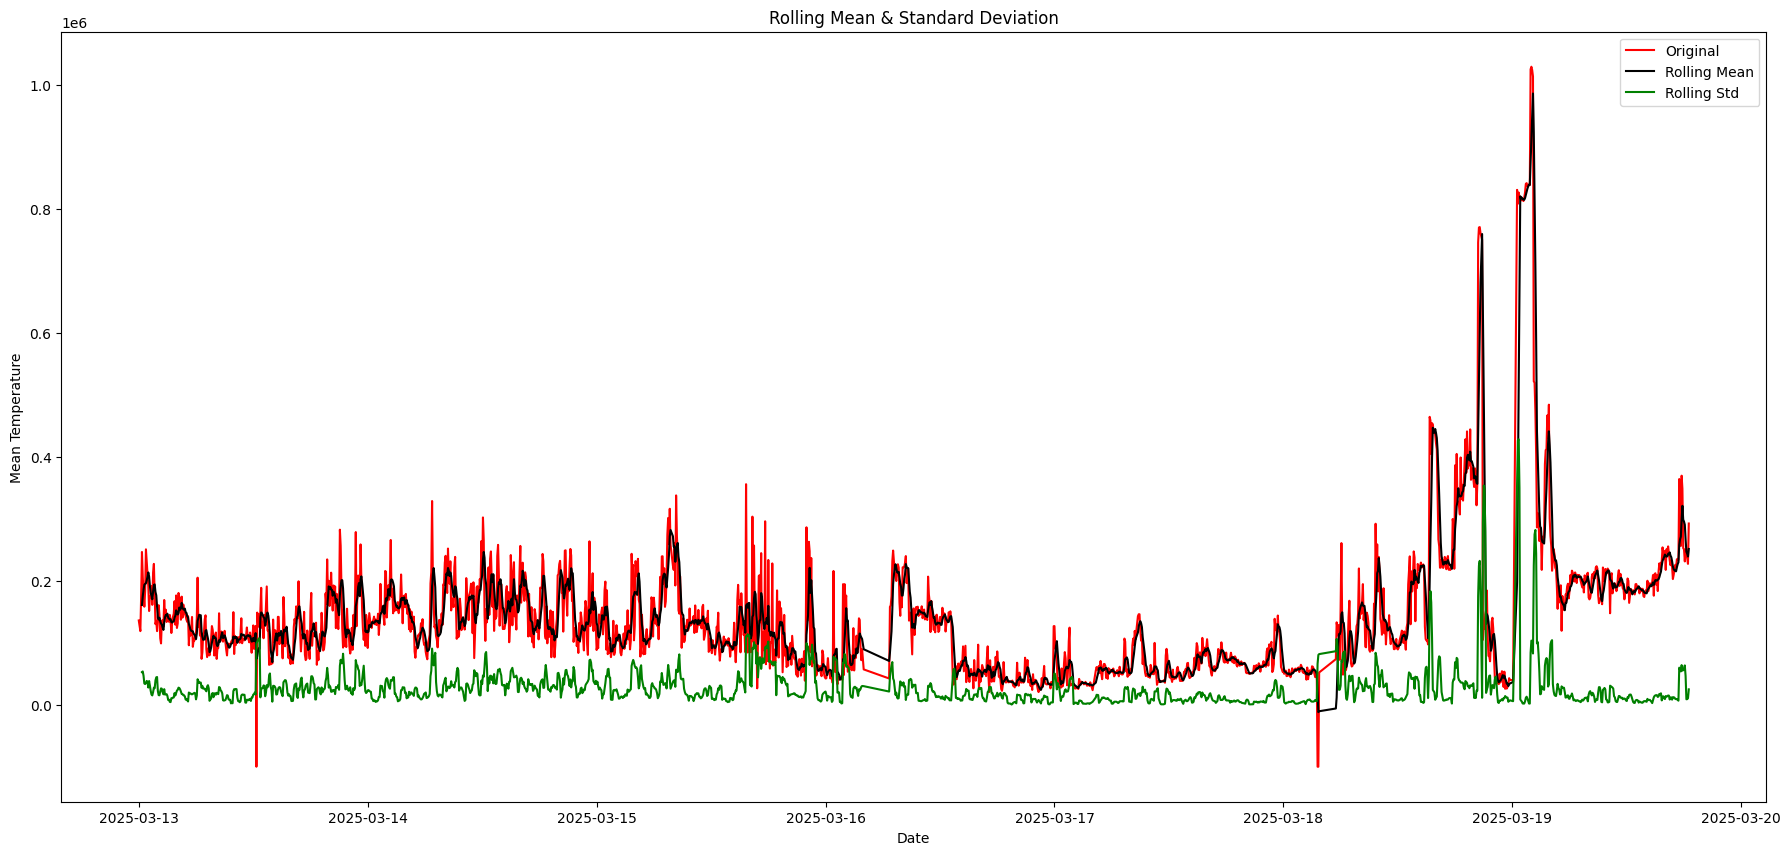

AttributeError: 'DataFrame' object has no attribute 'MeanTemp'

In [39]:
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = timeSeries["Temp-med"].rolling(window=5).mean()
    rolstd = timeSeries["Temp-med"].rolling(window=5).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(timeSeries["Temp-med"], color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.MeanTemp)